In [1]:
import os
import sys

## First let's look at our dataset and determine how it should be split up

In [4]:
os.getcwd()

'/home/jonah/PycharmProjects/phage_display_ML/datasets'

In [2]:
## Let's make a directory within datasets to store all our files
# Choose a short string 3-5 characters to denote this particular dataset
# For this one, I chose "ribo" for the ribosomal rna.
# Make sure to set "focus" in datatype as the same string

dataset_focus = "thc"
dataset_dir = f"./{dataset_focus}/"

if not os.path.isdir(dataset_dir):
    os.mkdir(dataset_dir)

In [4]:
# Let's import our data_prep tools
import data_prep as dp

Observed Characters: ['N', 'C', 'G', 'T', 'A']


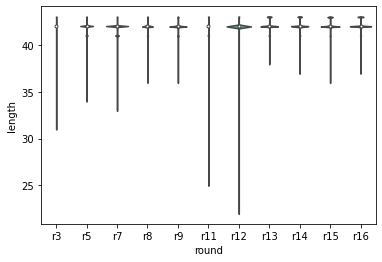

In [5]:
thc_df = dp.process_raw_fasta_files("r3.txt", "r5.txt", "r7.txt", "r8.txt", "r9.txt", "r11.txt", "r12.txt", "r13.txt", "r14.txt", "r15.txt", "r16.txt", in_dir="/mnt/D1/rna_data_repo/THCA_R/", out_dir=dataset_dir, violin_out="ribo_data_lengths", input_format="gunter")

In [ ]:
chars_to_remove = []
# These all indicate some uncertainty as to the id of the bases. We could also replace these with a gap if we wanted to.

In [ ]:
## Looking at the above graph + the length report in our out directory we see this

In [7]:
!cat "./thc/r3_len_report.txt"

Removed 0 Repeat Sequences
Length: 31 Number of Sequences 1
Length: 34 Number of Sequences 1
Length: 35 Number of Sequences 2
Length: 36 Number of Sequences 12
Length: 37 Number of Sequences 37
Length: 38 Number of Sequences 158
Length: 39 Number of Sequences 831
Length: 40 Number of Sequences 4363
Length: 41 Number of Sequences 428468
Length: 42 Number of Sequences 6728165
Length: 43 Number of Sequences 525426


## We see that the majority of data is length 119. But we can get 2x the data by extending our range from length 115 to length 121. To make the data uniform in length, we will add gaps to the end of all sequences b/t 115 and 121

In [ ]:
# So now we can define our datatype

# Datatype defines the basics of our data, Each datatype is specified for a group of related fasta files
# Focus - > short string specifier that gives the overall dataset we are using
# Molecule -> What kind of sequence data? currently protein, dna, and rna are supported
# id -> short string specifier ONLY for datasets which have different clustering methods (CLUSTERS ONLY)
# process -> How were the gaps added to each dataset, used to name directory (CLUSTERS ONLY)
# clusters -> How many clusters are in each data file (1 if no clusters)
# cluster_indices -> Define the lengths of data put in each cluster, It is inclusive so [12, 16] includes length 12 and length 16. There must be cluster_indices for each cluster
# gap_position_indices -> Index where gaps should be added to each sequence that is short of the maximum length. (-1 means add gaps to the end of the clusters)

thc_datatype = {"focus": "thc", "molecule": "rna", "id": None, "process": None, "clusters": 1, "gap_position_indices": [-1], "cluster_indices": [[41, 43]]}

## Before we do anything else, we need to copy our datatype to phage_display_ML/rbm_torch/analysis/global_info.py
## Also make sure to add the new datatype to the datatype_list in the same file.

## Next we need to process the raw files and make our own fasta files with our preferred formatting

In [9]:
# chars_to_remove = ["W", "D", "V", "M", "B", "R", "K", "Y", "H", "S"]
# chars_replace = {x: "-" for x in chars_to_remove}
dp.prepare_data_files("thc", thc_df, target_dir=dataset_dir, character_conversion={"T": "U", "N":"-"}, remove_chars=None) # Creates datafiles in target directory

## Now we have generated a data file that we can use for training our RBM or CRBM

In [8]:
# lets double check if only contains characters we know
# seqs, chars = dp.fasta_read(dataset_dir+"rfam.fasta")

In [9]:
# print(chars)

['C', 'G', '-', 'A', 'U']


In [10]:
!head -n 20 "./thc/r3.fasta"

>seq0-1
AUAAUACACCGCAGACGUUAUGCAUGAGCCCAGUGCUAGUCC-
>seq1-1
GACUUAAGAACCAUGCCCAGUGAAAACACCUCAAAAUCAACG-
>seq2-1
CAGAGCCGUCUAUAAGAGAGGUGAAGUGCAAUUCGACCAAGU-
>seq3-1
AAGUGAGAAACCAUGAGGGUGUCAUUAGGGAUUAACCAGCGC-
>seq4-1
GAGCAUGGGAUUUCUAUCUACGGCCGAUCAAACGAGGGACAA-
>seq5-1
AUCCGAUCACUCCUACGUCCCUACCCGCAAAAUGCGGGAAAA-
>seq6-1
CACAGGGGAUAUAGGCUAAGUGGCCUCAAUAUCACGCGUGCA-
>seq7-1
CAAGUCGCUCAACAUAGUCAUAGUUUCGUGGACUUAGAGUGA-
>seq8-1
GACGGCGAGACAUAAACUAAGAAUCAUUACGUGACGUGAAAU-
>seq9-1
UGUGGACCGGGGAGGAAGCACGGUUGGGCAUCUCAAAAGAUA-


# Our Last Step is to generate a dataset file, which will inform our models about the location of the data as well as other important details

In [11]:
sys.path.append("../")
import rbm_torch.analysis.global_info as gi

In [12]:
os.getcwd()

'/home/jonah/PycharmProjects/phage_display_ML/datasets'

In [12]:
gi.generate_dataset_file(["r3.fasta", "r5.fasta", "r7.fasta", "r8.fasta", "r9.fasta", "r10.fasta", "r11.fasta", "r12.fasta", "r13.fasta", "r14.fasta", "r15.fasta", "r16.fasta"], gi.supported_datatypes["thc"], destination="./dataset_files/")

In [13]:
!cat "./dataset_files/thc.json"

{"data_files": {"1": ["r3.fasta", "r5.fasta", "r7.fasta", "r8.fasta", "r9.fasta", "r10.fasta", "r11.fasta", "r12.fasta", "r13.fasta", "r14.fasta", "r15.fasta", "r16.fasta"]}, "rounds": {"1": ["r3", "r5", "r7", "r8", "r9", "r10", "r11", "r12", "r13", "r14", "r15", "r16"]}, "model_names": {"weights": {"1": ["r3_w", "r5_w", "r7_w", "r8_w", "r9_w", "r10_w", "r11_w", "r12_w", "r13_w", "r14_w", "r15_w", "r16_w"]}, "equal": {"1": ["r3", "r5", "r7", "r8", "r9", "r10", "r11", "r12", "r13", "r14", "r15", "r16"]}}, "local_model_dir": {"rbm": "/mnt/D1/globus/pig_trained_rbms/None", "crbm": "/mnt/D1/globus/pig_trained_crbms/None"}, "data_dir": "../../datasets/thc/", "server_model_dir": {"rbm": "datasets/thc/trained_rbms/", "crbm": "datasets/thc/trained_crbms/"}, "molecule": "rna", "configkey": {"1": "thc"}, "clusters": 1}

In [ ]:
# We're all set to run our models now, except for creating default configs for each dataset
# Here is an example one for crbm. It should be appended to crbm_configs.py and added to all_configs

ribo_default_config = {"fasta_file": "",
          "v_num": 121,
          "q": 5,
          "molecule": "rna",
          "epochs": 100, # get's overwritten by training script anyway
          "seed": seed, # this is defined in the config file
          "batch_size": 10000, # can be raised or lowered depending on memory usage
          "mc_moves": 4,
          "lr": 0.006,
          "lr_final": None, # automatically set as lr * 1e-2
          "decay_after": 0.75,
          "loss_type": "free_energy",
          "sample_type": "gibbs",
          "sequence_weights": None,
          "optimizer": "AdamW",
          "weight_decay": 0.001,  # l2 norm on all parameters
          "l1_2": 25.0,
          "lf": 5.0,
          "ld": 10.0,
          "data_worker_num": 4
          }


In [2]:
# TO figure out the convolution topology we use some helper functions in crbm.py

# This function gives all convolutions that fully sample all visible units on the conv transpose for a given data size
from rbm_torch.utils import suggest_conv_size

# one hot encoded vector of input size (B x V X Q) is the input the CRBM uses
visible_num = 121 # V
q_states = 5 #Q
input_shape = (visible_num, q_states)
suggest_conv_size(input_shape, padding_max=2, dilation_max=1, stride_max=2)

Finding Whole Convolutions for Input with 121 inputs:
Whole Convolution Found: Kernel: 1, Stride: 1, Dilation: 1, Padding: 0
Whole Convolution Found: Kernel: 1, Stride: 2, Dilation: 1, Padding: 0
Whole Convolution Found: Kernel: 1, Stride: 1, Dilation: 1, Padding: 1
Whole Convolution Found: Kernel: 1, Stride: 2, Dilation: 1, Padding: 1
Whole Convolution Found: Kernel: 1, Stride: 1, Dilation: 1, Padding: 2
Whole Convolution Found: Kernel: 1, Stride: 2, Dilation: 1, Padding: 2
Whole Convolution Found: Kernel: 2, Stride: 1, Dilation: 1, Padding: 0
Whole Convolution Found: Kernel: 2, Stride: 1, Dilation: 1, Padding: 1
Whole Convolution Found: Kernel: 2, Stride: 1, Dilation: 1, Padding: 2
Whole Convolution Found: Kernel: 3, Stride: 1, Dilation: 1, Padding: 0
Whole Convolution Found: Kernel: 3, Stride: 2, Dilation: 1, Padding: 0
Whole Convolution Found: Kernel: 3, Stride: 1, Dilation: 1, Padding: 1
Whole Convolution Found: Kernel: 3, Stride: 2, Dilation: 1, Padding: 1
Whole Convolution Found

## My current line of thinking is that having a dilation > 1 or a stride > 1 will introduce some position specific effects.

In [ ]:
## Idea: The size of the kernel controls defines the size of the motif/pattern of the convolutional filter. So for this dataset I expect long filters to capture the secondary structure of this rfam family

# It is possible to use different strides and dilations, but I think they only take away from the interpretability of the convolutional filters. Also, they can lead to unsampled visible units on the convolution transpose. Likewise using a hidden layer with the kernel size the same as the number of visible units is somewhat equivalent to an RBM if not exactly (I haven't verified). This introduces a positional dependence into the corresponding hidden layer of the model.

# So I will use sizes:  11, 25, 46, 86, 100, 112
# Motif Finding:  Local Features-------Global Features
# Names/Keys for hidden layers in the convolutional topology can be named anything you can use as key in a dictionary
# Model outputs are the average of each hidden layer with a set weight
ribo_default_config["convolution_topology"] = {"hidden10": {"number": 10, "kernel": (11, ribo_default_config["q"]), "stride": (1, 1),                                                "padding": (0, 0), "dilation": (1, 1), "output_padding": (0, 0), "weight": 1.0},
                                            "hidden25": {"number": 10, "kernel": (25, ribo_default_config["q"]), "stride": (1, 1), "padding": (0, 0), "dilation": (1, 1), "output_padding": (0, 0), "weight": 1.0},
                                            "hidden46": {"number": 10, "kernel": (46, ribo_default_config["q"]), "stride": (1, 1), "padding": (0, 0), "dilation": (1, 1), "output_padding": (0, 0), "weight": 1.0},
                                            "hidden86": {"number": 20, "kernel": (86, ribo_default_config["q"]), "stride": (1, 1), "padding": (0, 0), "dilation": (1, 1), "output_padding": (0, 0), "weight": 1.0},
                                              "hidden100": {"number": 20, "kernel": (100, ribo_default_config["q"]), "stride": (1, 1), "padding": (0, 0), "dilation": (1, 1), "output_padding": (0, 0), "weight": 1.0},
                                                "hidden112": {"number": 20, "kernel": (112, ribo_default_config["q"]), "stride": (1, 1), "padding": (0, 0), "dilation": (1, 1), "output_padding": (0, 0), "weight": 1.0},
                                             }

In [ ]:
### COPY THE ABOVE CELL TO CRBM CONFIGS AS WELL

In [ ]:
# Lets create a submission script for a slurm system to run using the script submit.py

# From Directory rbm_torch I ran
"python submit.py -d ribo -r all -p wzhengpu1 -q wildfire -m crbm -e 200 -g 2 --precision double"

# Use python submit.py -h for help!